Shapefile loaded successfully.
  CTLabel BoroCode   BoroName  CT2020 BoroCT2020 CDEligibil  \
0       1        1  Manhattan  000100    1000100       None   
1   14.01        1  Manhattan  001401    1001401       None   
2   14.02        1  Manhattan  001402    1001402       None   
3      18        1  Manhattan  001800    1001800       None   
4   22.01        1  Manhattan  002201    1002201       None   

                                             NTAName NTA2020 CDTA2020  \
0  The Battery-Governors Island-Ellis Island-Libe...  MN0191     MN01   
1                                    Lower East Side  MN0302     MN03   
2                                    Lower East Side  MN0302     MN03   
3                                    Lower East Side  MN0302     MN03   
4                                    Lower East Side  MN0302     MN03   

                                            CDTANAME        GEOID  PUMA  \
0  MN01 Financial District-Tribeca (CD 1 Equivalent)  36061000100  4121   
1

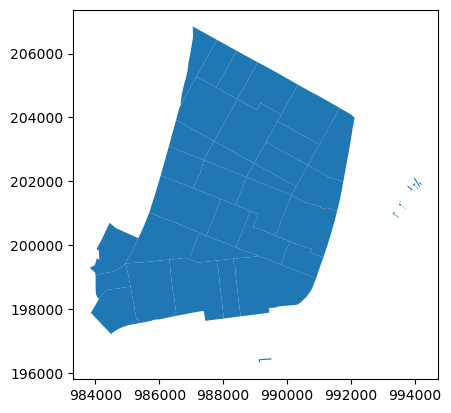

In [29]:
import geopandas as gpd

# Path to the shapefile (make sure all .shp, .shx, .dbf files are in the same folder)
shapefile_path = "/home/ymusic7/metro_restaurants/nyct2020.shp"

try:
    # Load the shapefile
    gdf = gpd.read_file(shapefile_path)
    print("Shapefile loaded successfully.")
    
    # Inspect the first few rows
    print(gdf.head())
    
    # Filter for Chinatown regions
    chinatown_gdf = gdf[
        gdf["NTAName"].str.contains("Chinatown", na=False, case=False) |
        gdf["CDTANAME"].str.contains("Chinatown", na=False, case=False)
    ]
    
    # Display the filtered GeoDataFrame
    print("Filtered GeoDataFrame (Chinatown regions):")
    print(chinatown_gdf)
    
    # Save the filtered GeoDataFrame to a new GeoJSON file
    output_geojson_path = "/home/ymusic7/metro_restaurants/chinatown_filtered.geojson"
    chinatown_gdf.to_file(output_geojson_path, driver="GeoJSON")
    print(f"Filtered GeoDataFrame saved to {output_geojson_path}.")
    
    # Optional: Visualize the filtered regions
    chinatown_gdf.plot()
    
except Exception as e:
    print(f"Error: {e}")


In [2]:
import pandas as pd
import glob
import os

In [31]:
# Reproject reviews_gdf to match Chinatown's CRS (EPSG:2263)
reviews_gdf = reviews_gdf.to_crs(chinatown_gdf.crs)
# Perform spatial join to get Chinatown reviews
chinatown_reviews = gpd.sjoin(reviews_gdf, chinatown_gdf, how="inner", predicate="intersects")

# Check if the join worked
print(f"Number of reviews in Chinatown: {len(chinatown_reviews)}")


Number of reviews in Chinatown: 8575


In [35]:
import pandas as pd

# Path to the New York restaurant reviews dataset
reviews_path = "/home/ymusic7/metro_restaurants/raw_data/newyork_metro_all_restaurant.csv"  # Replace with your actual file path

# Load the dataset into a pandas DataFrame
reviews_df = pd.read_csv(reviews_path)

# Display the first few rows of the dataset to inspect its structure
print(reviews_df.head())

# Check the column names and the data types of the dataset
print(reviews_df.info())


             name        lat        lon  \
0  China New Star  40.616002 -73.929836   
1         Chef Yu  40.753505 -73.992311   
2         Chef Yu  40.753505 -73.992311   
3         Chef Yu  40.753505 -73.992311   
4  China New Star  40.616002 -73.929836   

                                                text                 date  \
0  China New Star been around a long time. I've b...  2023-09-17 12:30:36   
1  吃了四顿，味道很地道。很幸运住在这家店边上，完全没有胃在异乡，菜量和价格店家更是厚到，良心。...  2018-07-10 01:36:46   
2                     味道还不错，不是那种假中餐，非常干净，服务ok的，值得推荐！  2022-06-08 10:14:55   
3             年夜饭 size is a bit smaller than I think  2024-03-31 07:58:50   
4  This place was FANTASTIC. I was looking for a ...  2023-11-30 12:13:06   

   score             keyword                                   addr language  
0      5  chinese restaurant  2212 Flatbush Ave, Brooklyn, NY 11234       de  
1      5  chinese restaurant        520 8th Ave, New York, NY 10018  unknown  
2      4  chinese restaurant        520 8

In [36]:
# Count how many Chinatown reviews are labeled as Chinese and Japanese
chinatown_reviews['keyword'] = chinatown_reviews['keyword'].str.lower()  # Ensure case consistency

# Filter for Chinese reviews
chinese_reviews = chinatown_reviews[chinatown_reviews['keyword'].str.contains('chinese', na=False)]

# Filter for Japanese reviews
japanese_reviews = chinatown_reviews[chinatown_reviews['keyword'].str.contains('japanese', na=False)]

# Display the counts
chinese_count = len(chinese_reviews)
japanese_count = len(japanese_reviews)

print(f"Number of Chinese reviews in Chinatown: {chinese_count}")
print(f"Number of Japanese reviews in Chinatown: {japanese_count}")


Number of Chinese reviews in Chinatown: 5291
Number of Japanese reviews in Chinatown: 3284


In [41]:
# Check the first few rows of chinatown_reviews
print(chinatown_reviews[['name', 'lat', 'lon', 'category']].head())

# Check the minimum and maximum lat/lon values
print(f"Latitude range: {chinatown_reviews['lat'].min()} to {chinatown_reviews['lat'].max()}")
print(f"Longitude range: {chinatown_reviews['lon'].min()} to {chinatown_reviews['lon'].max()}")


           name        lat        lon   category
12  Super Taste  40.715066 -73.993336  Chinatown
13  Super Taste  40.715066 -73.993336  Chinatown
15  Super Taste  40.715066 -73.993336  Chinatown
16  Super Taste  40.715066 -73.993336  Chinatown
17  Super Taste  40.715066 -73.993336  Chinatown
Latitude range: 40.711924 to 40.7330915
Longitude range: -73.9997875 to -73.983243


In [42]:
# Check CRS of both Chinatown reviews and Chinatown regions
print(f"CRS of Chinatown Reviews: {chinatown_reviews.crs}")
print(f"CRS of Chinatown GeoDataFrame: {chinatown_gdf.crs}")


CRS of Chinatown Reviews: EPSG:2263
CRS of Chinatown GeoDataFrame: EPSG:2263


In [43]:
# Check how many reviews are in the Chinatown reviews GeoDataFrame
print(f"Number of Chinatown reviews: {len(chinatown_reviews)}")


Number of Chinatown reviews: 8575


Number of Chinatown reviews: 8575
           name        lat        lon   category
12  Super Taste  40.715066 -73.993336  Chinatown
13  Super Taste  40.715066 -73.993336  Chinatown
15  Super Taste  40.715066 -73.993336  Chinatown
16  Super Taste  40.715066 -73.993336  Chinatown
17  Super Taste  40.715066 -73.993336  Chinatown


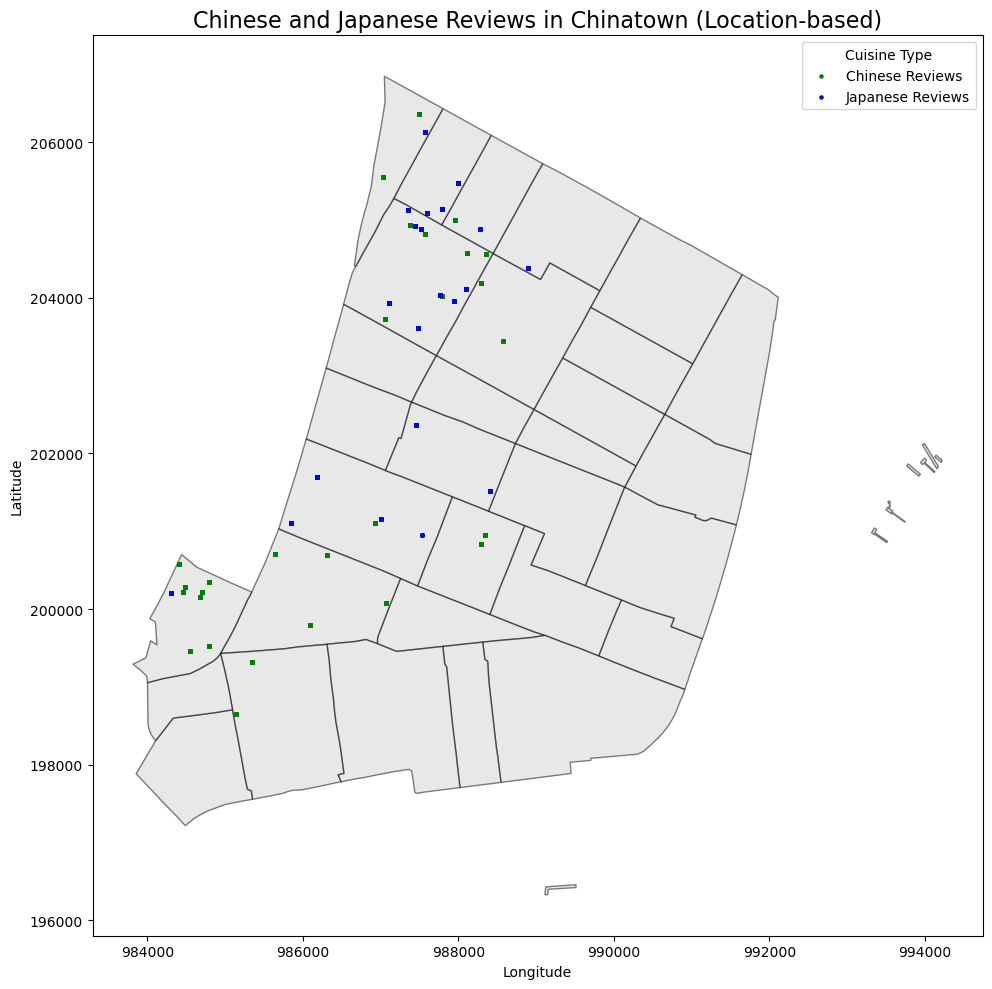

In [46]:
import matplotlib.pyplot as plt

# Check data presence
print(f"Number of Chinatown reviews: {len(chinatown_reviews)}")

# Check the first few rows to ensure valid lat/lon values
print(chinatown_reviews[['name', 'lat', 'lon', 'category']].head())

# Create the plot
fig, ax = plt.subplots(figsize=(10, 10))

# Plot Chinatown regions in light gray for context
chinatown_gdf.plot(ax=ax, color='lightgray', edgecolor='black', alpha=0.5, label='Chinatown Area')

# Plot Chinese reviews in green
chinese_reviews.plot(ax=ax, marker='o', color='green', markersize=5, label='Chinese Reviews')

# Plot Japanese reviews in blue
japanese_reviews.plot(ax=ax, marker='o', color='blue', markersize=5, label='Japanese Reviews')

# Add labels, legend, and title
plt.title('Chinese and Japanese Reviews in Chinatown (Location-based)', fontsize=16)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title="Cuisine Type", loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()



In [22]:
# Reproject reviews_gdf to match Chinatown's CRS
reviews_gdf = reviews_gdf.to_crs(chinatown_gdf.crs)
# Perform spatial join to get Chinatown reviews
chinatown_reviews = gpd.sjoin(reviews_gdf, chinatown_gdf, how="inner", predicate="intersects")

# Check the number of reviews within Chinatown
print(f"Number of reviews in Chinatown: {len(chinatown_reviews)}")



Number of reviews in Chinatown: 8575


In [23]:
# Display the first few rows of Chinatown reviews with coordinates
chinatown_reviews[['text', 'lat', 'lon']].head()


,text,lat,lon
12,味道不错，就是这牛肉拉面10.95 量越来越少，就一筷子一大夹没了,40.715066,-73.993336
13,以前很喜欢这家店的，味道做的超级棒，但是这次回纽约发现本来拉面和原来的配料不一样了，面还是一...,40.715066,-73.993336
15,刀削面根本不像刀削面，好像是一坨坨的，面吃着吃着想吐,40.715066,-73.993336
16,本来是很喜欢这家拉面店的之前也是经常来这家堂吃或者外卖 可是发现店老板对顾客有不公平对待 现...,40.715066,-73.993336
17,我最爱的一家拉面馆，面很劲道，汤底很好，份量也很足，价格也公道。我经常光顾他们店，绝对会向朋...,40.715066,-73.993336


In [24]:
# Define the general lat/lon bounds for Chinatown, NYC (approximate values)
chinatown_lat_bounds = (40.70, 40.75)  # Latitude range for Chinatown
chinatown_lon_bounds = (-74.01, -73.95)  # Longitude range for Chinatown

# Check if the coordinates of the first few reviews are within these bounds
chinatown_reviews_within_bounds = chinatown_reviews[
    (chinatown_reviews['lat'] >= chinatown_lat_bounds[0]) & 
    (chinatown_reviews['lat'] <= chinatown_lat_bounds[1]) & 
    (chinatown_reviews['lon'] >= chinatown_lon_bounds[0]) & 
    (chinatown_reviews['lon'] <= chinatown_lon_bounds[1])
]

# Display the first few reviews within the bounds
chinatown_reviews_within_bounds[['text', 'lat', 'lon']].head()


,text,lat,lon
12,味道不错，就是这牛肉拉面10.95 量越来越少，就一筷子一大夹没了,40.715066,-73.993336
13,以前很喜欢这家店的，味道做的超级棒，但是这次回纽约发现本来拉面和原来的配料不一样了，面还是一...,40.715066,-73.993336
15,刀削面根本不像刀削面，好像是一坨坨的，面吃着吃着想吐,40.715066,-73.993336
16,本来是很喜欢这家拉面店的之前也是经常来这家堂吃或者外卖 可是发现店老板对顾客有不公平对待 现...,40.715066,-73.993336
17,我最爱的一家拉面馆，面很劲道，汤底很好，份量也很足，价格也公道。我经常光顾他们店，绝对会向朋...,40.715066,-73.993336


                                                 text        lat        lon  \
12                  味道不错，就是这牛肉拉面10.95 量越来越少，就一筷子一大夹没了  40.715066 -73.993336   
13  以前很喜欢这家店的，味道做的超级棒，但是这次回纽约发现本来拉面和原来的配料不一样了，面还是一...  40.715066 -73.993336   
15                         刀削面根本不像刀削面，好像是一坨坨的，面吃着吃着想吐  40.715066 -73.993336   
16  本来是很喜欢这家拉面店的之前也是经常来这家堂吃或者外卖 可是发现店老板对顾客有不公平对待 现...  40.715066 -73.993336   
17  我最爱的一家拉面馆，面很劲道，汤底很好，份量也很足，价格也公道。我经常光顾他们店，绝对会向朋...  40.715066 -73.993336   

   category  
12    Other  
13    Other  
15    Other  
16    Other  
17    Other  


/scratch/local/jobs/30206615/ipykernel_3398310/2312350440.py:26: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  category_reviews.plot(ax=ax, marker='o', color=color, markersize=8, label=f'{category} Reviews')


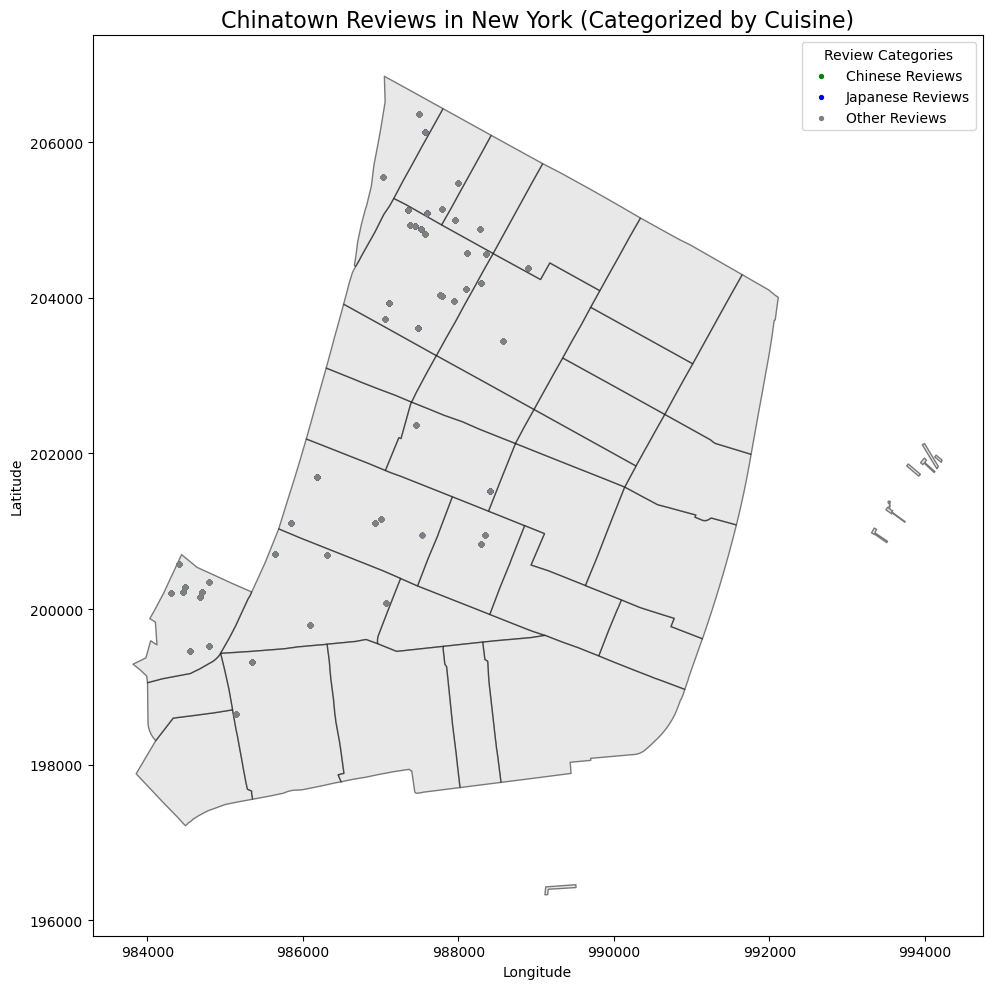

In [28]:
import matplotlib.pyplot as plt

# Check the first few rows of chinatown_reviews to ensure data is valid
print(chinatown_reviews[['text', 'lat', 'lon', 'category']].head())

# Define color mapping for categories
color_map = {
    'Chinatown': 'lightgray',
    'Chinese': 'green',
    'Japanese': 'blue',
    'Other': 'gray'
}

# Create a plot
fig, ax = plt.subplots(figsize=(10, 10))

# Plot Chinatown regions in light gray for context
chinatown_gdf.plot(ax=ax, color='lightgray', edgecolor='black', alpha=0.5, label='Chinatown Area')

# Plot reviews based on cuisine categories
for category, color in color_map.items():
    # Filter reviews by category
    category_reviews = chinatown_reviews[chinatown_reviews['category'] == category]
    
    # Plot the reviews for the current category with a larger marker size
    category_reviews.plot(ax=ax, marker='o', color=color, markersize=8, label=f'{category} Reviews')

# Add labels, legend, and title
plt.title('Chinatown Reviews in New York (Categorized by Cuisine)', fontsize=16)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title="Review Categories", loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()



In [10]:
# Count the number of reviews in Chinatown and non-Chinatown DataFrames
chinatown_count = len(chinatown_reviews)
non_chinatown_count = len(non_chinatown_reviews)

print(f"Number of reviews in Chinatown restaurants: {chinatown_count}")
print(f"Number of reviews in non-Chinatown restaurants: {non_chinatown_count}")


Number of reviews in Chinatown restaurants: 8575
Number of reviews in non-Chinatown restaurants: 220866


In [11]:
# Check for any missing coordinates
print(reviews_df[['lat', 'lon']].isna().sum())



lat    0
lon    0
dtype: int64


In [49]:
# Convert review text to lowercase for case-insensitive matching
chinatown_reviews['mentions_chinatown'] = chinatown_reviews['text'].str.contains('chinatown', case=False, na=False)


mention_chinatown_count = chinatown_reviews['mentions_chinatown'].sum()

print(f"Number of reviews that mention Chinatown: {mention_chinatown_count}")



Number of reviews that mention Chinatown: 328


In [51]:
# List of framing keywords that we are interested in
framing_keywords = ['authentic', 'exotic', 'luxury', 'traditional', 'genuine', 'refined', 'upscale', 'cheap', 'affordable']

# Ensure text is lowercased for case-insensitive matching
chinatown_reviews['text'] = chinatown_reviews['text'].str.lower()

# Create a new column for each framing keyword to track whether it's mentioned in the review
for keyword in framing_keywords:
    chinatown_reviews[keyword] = chinatown_reviews['text'].str.contains(keyword, na=False)

# Show the first few rows to check if the keyword columns are created correctly
print(chinatown_reviews[['text'] + framing_keywords].head())

# Now, let's count how many reviews mention each framing keyword
keyword_counts = chinatown_reviews[framing_keywords].sum()

# Print counts of each framing keyword
print("Framing Keyword Counts in Chinatown Reviews:")
print(keyword_counts)

# Additionally, count how many reviews mention the word "Chinese" or "Japanese"
# Filtering Chinese and Japanese reviews based on 'keyword' column
chinese_reviews = chinatown_reviews[chinatown_reviews['keyword'].str.contains('chinese', na=False)]
japanese_reviews = chinatown_reviews[chinatown_reviews['keyword'].str.contains('japanese', na=False)]

# Count reviews for each cuisine type
chinese_reviews_count = len(chinese_reviews)
japanese_reviews_count = len(japanese_reviews)

print(f"Number of Chinese reviews in Chinatown: {chinese_reviews_count}")
print(f"Number of Japanese reviews in Chinatown: {japanese_reviews_count}")



                                                 text  authentic  exotic  \
12                  味道不错，就是这牛肉拉面10.95 量越来越少，就一筷子一大夹没了      False   False   
13  以前很喜欢这家店的，味道做的超级棒，但是这次回纽约发现本来拉面和原来的配料不一样了，面还是一...      False   False   
15                         刀削面根本不像刀削面，好像是一坨坨的，面吃着吃着想吐      False   False   
16  本来是很喜欢这家拉面店的之前也是经常来这家堂吃或者外卖 可是发现店老板对顾客有不公平对待 现...      False   False   
17  我最爱的一家拉面馆，面很劲道，汤底很好，份量也很足，价格也公道。我经常光顾他们店，绝对会向朋...      False   False   

    luxury  traditional  genuine  refined  upscale  cheap  affordable  
12   False        False    False    False    False  False       False  
13   False        False    False    False    False  False       False  
15   False        False    False    False    False  False       False  
16   False        False    False    False    False  False       False  
17   False        False    False    False    False  False       False  
Framing Keyword Counts in Chinatown Reviews:
authentic      576
exotic          11
luxury           4
tradition

In [62]:
# Drop the geometry column to save as a CSV (geometry is not supported in CSV files)
chinatown_reviews_df = chinatown_reviews.drop(columns=['geometry'])

# Save the filtered Chinatown reviews DataFrame to CSV
output_csv_path = "/home/ymusic7/metro_restaurants/chinatown_reviews.csv"
chinatown_reviews_df.to_csv(output_csv_path, index=False)

print(f"Filtered Chinatown reviews DataFrame saved to {output_csv_path}.")


Filtered Chinatown reviews DataFrame saved to /home/ymusic7/metro_restaurants/chinatown_reviews.csv.


In [66]:
print(chinatown_reviews.dtypes)

name                    object
lat                    float64
lon                    float64
text                    object
date                    object
score                    int64
keyword                 object
addr                    object
language                object
geometry              geometry
index_right              int64
CTLabel                 object
BoroCode                object
BoroName                object
CT2020                  object
BoroCT2020              object
CDEligibil              object
NTAName                 object
NTA2020                 object
CDTA2020                object
CDTANAME                object
GEOID                   object
PUMA                    object
Shape_Leng             float64
Shape_Area             float64
category                object
mentions_chinatown        bool
authentic                 bool
exotic                    bool
luxury                    bool
traditional               bool
genuine                   bool
refined 

In [72]:
# Select relevant columns for LDA and framing analysis
framing_keywords = ['authentic', 'exotic', 'luxury', 'traditional', 'genuine', 'refined', 'upscale', 'cheap', 'affordable']
chinatown_reviews_filtered = chinatown_reviews_no_geom[['text'] + framing_keywords]

# Check the columns after filtering
print(chinatown_reviews_filtered.columns)


Index(['text', 'authentic', 'exotic', 'luxury', 'traditional', 'genuine',
       'refined', 'upscale', 'cheap', 'affordable'],
      dtype='object')


In [77]:
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, StringType, BooleanType

# Initialize Spark session
spark = SparkSession.builder.appName("LDAForChinatownReviews").getOrCreate()

# Define the schema for the Spark DataFrame based on the relevant columns
schema = StructType([
    StructField("text", StringType(), True),
    
    StructField("keyword", StringType(), True),  # Add 'keyword' column for cuisine type (Chinese or Japanese)
    StructField("authentic", BooleanType(), True),
    
    StructField("exotic", BooleanType(), True),
    StructField("luxury", BooleanType(), True),
    StructField("traditional", BooleanType(), True),
    StructField("genuine", BooleanType(), True),
    StructField("refined", BooleanType(), True),
    StructField("upscale", BooleanType(), True),
    StructField("cheap", BooleanType(), True),
    StructField("affordable", BooleanType(), True)
])

# Convert the filtered DataFrame to a Spark DataFrame with the new schema
chinatown_reviews_filtered = chinatown_reviews[['text', 'keyword'] + framing_keywords]
chinatown_spark_df = spark.createDataFrame(chinatown_reviews_filtered, schema)

# Verify the schema of the Spark DataFrame
chinatown_spark_df.printSchema()



root
 |-- text: string (nullable = true)
 |-- keyword: string (nullable = true)
 |-- authentic: boolean (nullable = true)
 |-- exotic: boolean (nullable = true)
 |-- luxury: boolean (nullable = true)
 |-- traditional: boolean (nullable = true)
 |-- genuine: boolean (nullable = true)
 |-- refined: boolean (nullable = true)
 |-- upscale: boolean (nullable = true)
 |-- cheap: boolean (nullable = true)
 |-- affordable: boolean (nullable = true)



In [79]:
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, StringType, BooleanType

# Initialize Spark session
spark = SparkSession.builder.appName("LDAForChinatownReviews").getOrCreate()

# Define the schema for the Spark DataFrame based on the relevant columns
schema = StructType([
    StructField("text", StringType(), True),
    StructField("keyword", StringType(), True),  # Add 'keyword' column for cuisine type (Chinese or Japanese)
    StructField("authentic", BooleanType(), True),
    StructField("exotic", BooleanType(), True),
    StructField("luxury", BooleanType(), True),
    StructField("traditional", BooleanType(), True),
    StructField("genuine", BooleanType(), True),
    StructField("refined", BooleanType(), True),
    StructField("upscale", BooleanType(), True),
    StructField("cheap", BooleanType(), True),
    StructField("affordable", BooleanType(), True)
])

# Convert the filtered DataFrame to a Spark DataFrame with the new schema
chinatown_reviews_filtered = chinatown_reviews[['text', 'keyword'] + framing_keywords]
chinatown_spark_df = spark.createDataFrame(chinatown_reviews_filtered, schema)

# Verify the schema of the Spark DataFrame
chinatown_spark_df.printSchema()



root
 |-- text: string (nullable = true)
 |-- keyword: string (nullable = true)
 |-- authentic: boolean (nullable = true)
 |-- exotic: boolean (nullable = true)
 |-- luxury: boolean (nullable = true)
 |-- traditional: boolean (nullable = true)
 |-- genuine: boolean (nullable = true)
 |-- refined: boolean (nullable = true)
 |-- upscale: boolean (nullable = true)
 |-- cheap: boolean (nullable = true)
 |-- affordable: boolean (nullable = true)



In [80]:
# Filter Chinese and Japanese reviews based on the 'keyword' column
chinese_reviews = chinatown_spark_df.filter(chinatown_spark_df.keyword == "chinese")
japanese_reviews = chinatown_spark_df.filter(chinatown_spark_df.keyword == "japanese")

# Show the number of reviews for each type
print(f"Number of Chinese reviews: {chinese_reviews.count()}")
print(f"Number of Japanese reviews: {japanese_reviews.count()}")


25/04/04 14:57:49 INFO CodeGenerator: Code generated in 178.449884 ms
25/04/04 14:57:49 INFO DAGScheduler: Registering RDD 21 (count at NativeMethodAccessorImpl.java:0) as input to shuffle 0
25/04/04 14:57:49 INFO DAGScheduler: Got map stage job 0 (count at NativeMethodAccessorImpl.java:0) with 8 output partitions
25/04/04 14:57:49 INFO DAGScheduler: Final stage: ShuffleMapStage 0 (count at NativeMethodAccessorImpl.java:0)
25/04/04 14:57:49 INFO DAGScheduler: Parents of final stage: List()
25/04/04 14:57:49 INFO DAGScheduler: Missing parents: List()
25/04/04 14:57:49 INFO DAGScheduler: Submitting ShuffleMapStage 0 (MapPartitionsRDD[21] at count at NativeMethodAccessorImpl.java:0), which has no missing parents
25/04/04 14:57:49 INFO MemoryStore: Block broadcast_0 stored as values in memory (estimated size 16.6 KiB, free 434.4 MiB)
25/04/04 14:57:49 INFO MemoryStore: Block broadcast_0_piece0 stored as bytes in memory (estimated size 8.5 KiB, free 434.4 MiB)
25/04/04 14:57:49 INFO BlockMa

25/04/04 14:57:50 INFO PythonRunner: Times: total = 988, boot = 977, init = 8, finish = 3
25/04/04 14:57:50 INFO PythonRunner: Times: total = 1002, boot = 984, init = 14, finish = 4
25/04/04 14:57:51 INFO Executor: Finished task 0.0 in stage 0.0 (TID 0). 2381 bytes result sent to driver
25/04/04 14:57:51 INFO Executor: Finished task 7.0 in stage 0.0 (TID 7). 2381 bytes result sent to driver
25/04/04 14:57:51 INFO PythonRunner: Times: total = 1034, boot = 1010, init = 20, finish = 4
25/04/04 14:57:51 INFO PythonRunner: Times: total = 1070, boot = 1020, init = 47, finish = 3
25/04/04 14:57:51 INFO Executor: Finished task 5.0 in stage 0.0 (TID 5). 2381 bytes result sent to driver
25/04/04 14:57:51 INFO PythonRunner: Times: total = 1013, boot = 992, init = 17, finish = 4
25/04/04 14:57:51 INFO PythonRunner: Times: total = 1031, boot = 1003, init = 24, finish = 4
25/04/04 14:57:51 INFO Executor: Finished task 3.0 in stage 0.0 (TID 3). 2381 bytes result sent to driver
25/04/04 14:57:51 INFO 

25/04/04 14:57:51 INFO MemoryStore: Block broadcast_1_piece0 stored as bytes in memory (estimated size 5.5 KiB, free 434.4 MiB)
25/04/04 14:57:51 INFO BlockManagerInfo: Added broadcast_1_piece0 in memory on midway3-0264.rcc.local:33321 (size: 5.5 KiB, free: 434.4 MiB)
25/04/04 14:57:51 INFO SparkContext: Created broadcast 1 from broadcast at DAGScheduler.scala:1513
25/04/04 14:57:51 INFO DAGScheduler: Submitting 1 missing tasks from ResultStage 2 (MapPartitionsRDD[24] at count at NativeMethodAccessorImpl.java:0) (first 15 tasks are for partitions Vector(0))
25/04/04 14:57:51 INFO TaskSchedulerImpl: Adding task set 2.0 with 1 tasks resource profile 0
25/04/04 14:57:51 INFO TaskSetManager: Starting task 0.0 in stage 2.0 (TID 8) (midway3-0264.rcc.local, executor driver, partition 0, NODE_LOCAL, 4453 bytes) taskResourceAssignments Map()
25/04/04 14:57:51 INFO Executor: Running task 0.0 in stage 2.0 (TID 8)
25/04/04 14:57:51 INFO BlockManagerInfo: Removed broadcast_0_piece0 on midway3-0264.

25/04/04 14:57:51 INFO PythonRunner: Times: total = 58, boot = -664, init = 720, finish = 2
25/04/04 14:57:51 INFO PythonRunner: Times: total = 74, boot = -791, init = 863, finish = 2
25/04/04 14:57:51 INFO PythonRunner: Times: total = 57, boot = -837, init = 890, finish = 4
25/04/04 14:57:51 INFO PythonRunner: Times: total = 88, boot = -809, init = 854, finish = 43
25/04/04 14:57:51 INFO Executor: Finished task 6.0 in stage 3.0 (TID 15). 2381 bytes result sent to driver
25/04/04 14:57:51 INFO PythonRunner: Times: total = 71, boot = -815, init = 884, finish = 2
25/04/04 14:57:51 INFO Executor: Finished task 4.0 in stage 3.0 (TID 13). 2381 bytes result sent to driver
25/04/04 14:57:51 INFO PythonRunner: Times: total = 103, boot = -796, init = 856, finish = 43
25/04/04 14:57:51 INFO Executor: Finished task 1.0 in stage 3.0 (TID 10). 2381 bytes result sent to driver
25/04/04 14:57:51 INFO PythonRunner: Times: total = 45, boot = -754, init = 796, finish = 3
25/04/04 14:57:51 INFO TaskSetMa